#Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Dataset Imports - from Google drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
raw_data_path = r'/content/gdrive/MyDrive/Datasets/data_assignment.csv'

In [4]:
raw_data = pd.read_csv(raw_data_path)
raw_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

## Defining EDA function

In [5]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 150)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all').T)
    print("=" * 150)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 150)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 150)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 150)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 150)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 150)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 150)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 150)
    display(dataframe.head(3))

In [6]:
get_metadata(raw_data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
STATISTICAL INFORMAT

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataframe Shape
 (8523, 12)
Number of Duplicate Rows
 0
NULL Values Check
Item_Identifier 0
Item_Weight 1463
Item_Fat_Content 0
Item_Visibility 0
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 2410
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0
UNIQUE VALUES IN EVERY COLUMN
Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
------------------------------------------------------------------------------------------------------------------------------------------------------
Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


Inference:

*  8523 rows, 12 columns
*   4 Float Columns, 1 Integer Column, 7 String Columns  
*   From the statistical summary, we can infer that the Item_Visibility and Item_Outlet_Sales columns have outliers(more can be analysed using BoxPlot)
    * Item_Visibility
      *  min(0th percentile) - 0.0 ==> Visibility cannot be 0 so, needs pre-processing
      *  25th percentile - 0.026989
      *  50th percentile - 0.053931
      *  75th percentile - 0.094585
      *  max(100th percentile) - 0.328391[differs much from the 75th percentile]
    * Item_Outlet_Sales
      *  min(0th percentile) - 33.29
      *  25th percentile - 834.2474
      *  50th percentile - 1794.331
      *  75th percentile - 3101.2964
      *  max(100th percentile) - 13086.9648[differs much from the 75th percentile]
*  Item_Weight and Outlet_Size columns has NULL values
*  Item_Fat_Content has error values - ['Low Fat', 'Regular', 'low fat', 'LF', 'reg'] - Low Fat and Regular are the only 2 categories
* Outlet_Establishment_Year has larger values as it corresponds to 'Year'. So, we could create a new column as 'Outlet_Age'



# Pre-Processing

## Transforming Typo Errors

In [8]:
raw_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
fat_content = raw_data.replace({'Item_Fat_Content' : {'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}})
fat_content.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [10]:
fat_content['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Imputing NULL values

### Item_Weight

In [11]:
fat_content['Item_Weight'].isnull().sum()

1463

In [12]:
fillna_itemwt = fat_content.copy()
fillna_itemwt.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [13]:
fillna_itemwt['Item_Weight'] = fat_content['Item_Weight'].fillna(fat_content.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Weight'].transform('mean'))
fillna_itemwt.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [14]:
fillna_itemwt['Item_Weight'].isnull().sum()

0

### Outlet_Type

Analysis before Imputing

In [15]:
high = fillna_itemwt[fillna_itemwt['Outlet_Size']=='High'][['Outlet_Location_Type', 'Outlet_Type']]
print("Outlet_Type=High:\n", high[['Outlet_Location_Type', 'Outlet_Type']].drop_duplicates())

medium = fillna_itemwt[fillna_itemwt['Outlet_Size']=='Medium'][['Outlet_Location_Type', 'Outlet_Type']]
print("\nOutlet_Type=Medium:\n", medium[['Outlet_Location_Type', 'Outlet_Type']].drop_duplicates())

small = fillna_itemwt[fillna_itemwt['Outlet_Size']=='Small'][['Outlet_Location_Type', 'Outlet_Type']]
print("\nOutlet_Type=Small:\n", small[['Outlet_Location_Type', 'Outlet_Type']].drop_duplicates())

Outlet_Type=High:
   Outlet_Location_Type        Outlet_Type
4               Tier 3  Supermarket Type1

Outlet_Type=Medium:
   Outlet_Location_Type        Outlet_Type
0               Tier 1  Supermarket Type1
1               Tier 3  Supermarket Type2
7               Tier 3  Supermarket Type3

Outlet_Type=Small:
    Outlet_Location_Type        Outlet_Type
11               Tier 1  Supermarket Type1
19               Tier 2  Supermarket Type1
23               Tier 1      Grocery Store


In [16]:
fillna_itemwt[fillna_itemwt['Outlet_Size'].isnull()][['Outlet_Location_Type', 'Outlet_Type']].drop_duplicates()

,Outlet_Location_Type,Outlet_Type
3,Tier 3,Grocery Store
8,Tier 2,Supermarket Type1


Imputing Outlet_Type values:
1.   Medium : Outlet_Location_Type - Tier 3, Outlet_Type - Grocery Store
2.   Small : Outlet_Location_Type - Tier 2, Outlet_Type - Supermarket Type1 [This is a straight-forward imputation with the previous analysis]



In [17]:
def get_outlet_Type(row):
    if (row['Outlet_Location_Type']=='Tier 3') & (row['Outlet_Type']=='Supermarket Type1'):
        return 'High'
    if (row['Outlet_Location_Type']=='Tier 1') & (row['Outlet_Type']=='Supermarket Type1') | (row['Outlet_Location_Type']=='Tier 3') & (row['Outlet_Type']=='Supermarket Type2') | (row['Outlet_Location_Type']=='Tier 3') & (row['Outlet_Type']=='Grocery Store'):
        return 'Medium'
    elif (row['Outlet_Location_Type']=='Tier 1') & (row['Outlet_Type']=='Supermarket Type1') | (row['Outlet_Location_Type']=='Tier 2') & (row['Outlet_Type']=='Supermarket Type1') | (row['Outlet_Location_Type']=='Tier 1') & (row['Outlet_Type']=='Grocery Store'):
        return 'Small'
    else:
        return 'Medium'

In [18]:
imp_outlet_type = fillna_itemwt.copy()
imp_outlet_type['Outlet_Size'] = fillna_itemwt.apply(get_outlet_Type, axis=1)
imp_outlet_type.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [19]:
imp_outlet_type['Outlet_Size'].isnull().sum()

0

In [20]:
fillna_itemwt['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
imp_outlet_type['Outlet_Size'].value_counts()

Medium    4278
Small     3313
High       932
Name: Outlet_Size, dtype: int64

In [22]:
imp_outlet_type['Outlet_Size'].isnull().sum()

0

## Imputing Error Values Item_Visibility

In [23]:
print("No. of rows where Item_Visibility=0 :", len(imp_outlet_type[imp_outlet_type['Item_Visibility']==0].index))

No. of rows where Item_Visibility=0 : 526


In [24]:
def replace_error_values(group):
  '''Filter the rows with Item_Visibility==0 and replace with group Average'''
  mask = group==0
  group[mask] = group[~mask].mean()
  return group

In [25]:
error_visib = imp_outlet_type.copy()
error_visib_groupby = error_visib.groupby(['Outlet_Size', 'Item_Type'])
error_visib['Item_Visibility'] = error_visib['Item_Visibility'].transform(replace_error_values)
error_visib.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [26]:
print("No. of rows where Item_Visibility=0 :", len(error_visib[error_visib['Item_Visibility']==0].index))

No. of rows where Item_Visibility=0 : 0


## Creating Oultet_Age out of Outlet_Establishment_Year

In [31]:
outlet_age = error_visib.copy()
outlet_age.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [33]:
from datetime import date

outlet_age['Outlet_Age'] = date.today().year - outlet_age['Outlet_Establishment_Year']
outlet_age.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14


In [35]:
outlet_age.drop('Outlet_Establishment_Year', axis=1, inplace=True)
outlet_age.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14


# Oulier Detection

In [36]:
data = outlet_age.copy()

## Item_Visibility

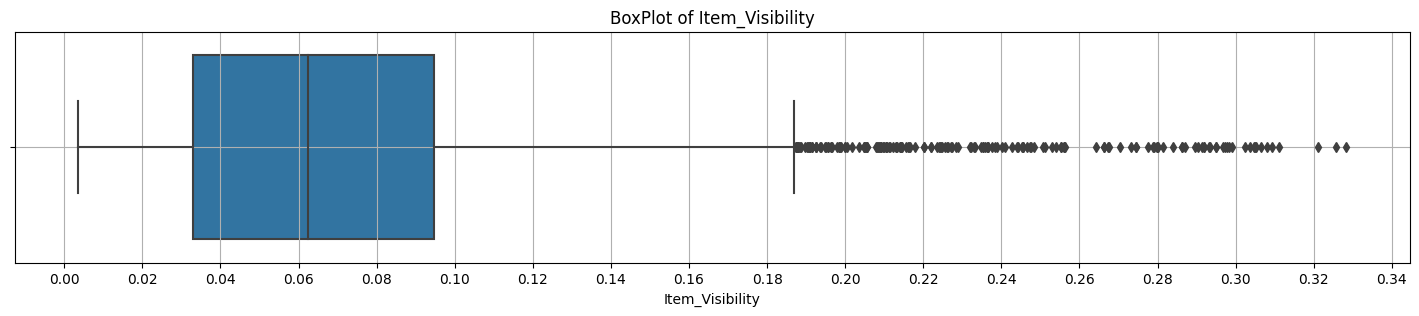

In [37]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Item_Visibility')
sns.boxplot(x = data['Item_Visibility'])
plt.grid()
plt.xticks(np.arange(0, 0.35, step=0.02))
plt.show()

## Item_Outlet_Sales

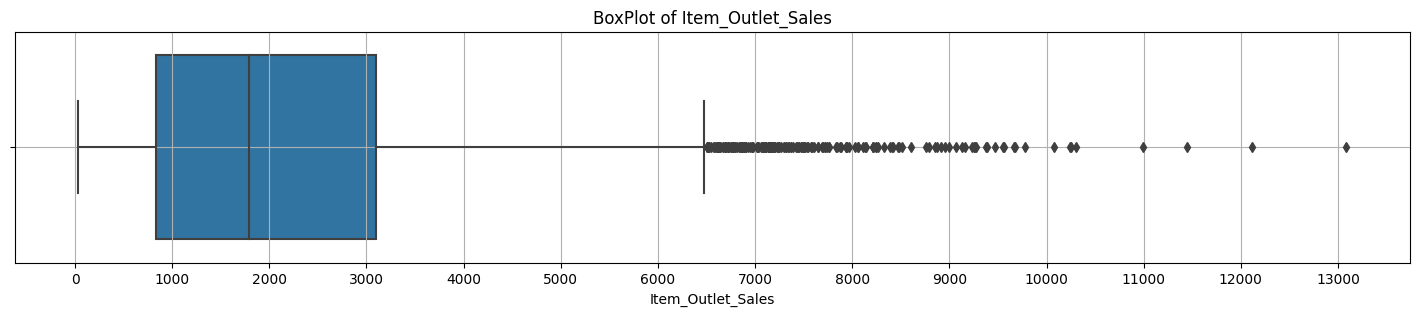

In [38]:
plt.figure(figsize=(18,3))
plt.title('BoxPlot of Item_Outlet_Sales')
sns.boxplot(x = data['Item_Outlet_Sales'])
plt.grid()
plt.xticks(np.arange(0, 13500, step=1000))
plt.show()

# Final Data

In [39]:
get_metadata(data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Age            8523 non-null   object 
dtypes: float64(4), object(8)
memory usage: 799.2+ KB
None
STATISTICAL INFORMATION



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,8523.0,NaN,NaN,NaN,12.860708,4.237815,4.555,9.31,12.8,16.0,21.35
Item_Fat_Content,8523,2,Low Fat,5517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.070482,0.04873,0.003575,0.033085,0.062517,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size,8523,3,Medium,4278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Type,8523,4,Supermarket Type1,5577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataframe Shape
 (8523, 12)
Number of Duplicate Rows
 0
NULL Values Check
Item_Identifier 0
Item_Weight 0
Item_Fat_Content 0
Item_Visibility 0
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Size 0
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0
Outlet_Age 0
UNIQUE VALUES IN EVERY COLUMN
Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
------------------------------------------------------------------------------------------------------------------------------------------------------
Item_Weight
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       13.70717699 16.2        11.8        18.5        15.1
 17.6        16.35        9.         11.40032787 13.35       18.85
 12.01330292 14.6        12.55299618 13.85       13.          7.645
 11.65        5.925      12.80428854 19.25       18.6        18.7
 17.85       10.         13.70836327  8.85       12.02711584  9.8
 13.6        21.35       12.15        6.42       19.6        15.85

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
